In [1]:
#Test koneksi via LED
import dodoku
import time

conn = dodoku.MDCLab()

print('Test LED blink')
conn.LED(100)

for i in (0,100,0,100,0,100):
    time.sleep(0.5)
    conn.LED(i)
print('Koneksi baik: ' + str(i)+' %')

Koneksi serial . . . 
Terhubung di port: /dev/cu.wchusbserial1410
Test LED blink
Koneksi baik: 100 %


In [7]:
#Test motor DC 
import dodoku
import numpy as np
import time

# set koneksi ke wemos
conn = dodoku.MDCLab()

print('LED Indikator ON')
conn.LED(50)
    
# Set kecepatan awal, setpoint, waktu
kec = 0
sp  = 150
awal = time.time()

# set durasi percobaan dan jumlah loop
run_time = 1.0
loops = int(60.0*run_time)
    
#siapkan tempat untuk semua påarameter yang akan di simpan
waktu   = np.zeros(loops)
c_v     = np.zeros(loops)
error   = np.zeros(loops)
aktuasi = np.zeros(loops)

time.sleep(4.0) 
for i in range (1, loops):
        
    # menyimpan waktu tiap iterasi
    skrg = time.time()
    waktu[i] = skrg - awal
        
    # baca kecepatan current value
    c_v[i] = conn.KC1
    
    # Hitung error
    error[i] = sp - c_v[i]

    # On-Off
    # atur kecepatan berdasarkan error
    if error[i] >= 0:
        kec = 100
    else:
        kec = 0
        
    conn.U1(kec)
    conn.LED(kec)
    aktuasi[i]=kec

    # Tampilkan 
    print('Waktu: '+str(int(waktu[i]))+' Kecepatan: '+str(c_v[i])+' rpm, Sinyal kontrol: '+str(int(aktuasi[i]))+' %, error: '+str(error[i]))
        
print('Percobaan selesai')
time.sleep(1.0) 
print('Matikan Motor')
conn.U1(0.0)
 

Koneksi serial . . . 
Terhubung di port: /dev/cu.wchusbserial1410
LED Indikator ON
Waktu: 4 Kecepatan: 0.0 rpm, Sinyal kontrol: 100 %, error: 150.0
Waktu: 5 Kecepatan: 183.0 rpm, Sinyal kontrol: 0 %, error: -33.0
Waktu: 6 Kecepatan: 12.0 rpm, Sinyal kontrol: 100 %, error: 138.0
Waktu: 7 Kecepatan: 186.0 rpm, Sinyal kontrol: 0 %, error: -36.0
Waktu: 8 Kecepatan: 12.0 rpm, Sinyal kontrol: 100 %, error: 138.0
Waktu: 9 Kecepatan: 183.0 rpm, Sinyal kontrol: 0 %, error: -33.0
Waktu: 10 Kecepatan: 12.0 rpm, Sinyal kontrol: 100 %, error: 138.0
Waktu: 11 Kecepatan: 195.0 rpm, Sinyal kontrol: 0 %, error: -45.0
Waktu: 12 Kecepatan: 12.0 rpm, Sinyal kontrol: 100 %, error: 138.0
Waktu: 14 Kecepatan: 189.0 rpm, Sinyal kontrol: 0 %, error: -39.0
Waktu: 15 Kecepatan: 15.0 rpm, Sinyal kontrol: 100 %, error: 135.0
Waktu: 16 Kecepatan: 186.0 rpm, Sinyal kontrol: 0 %, error: -36.0
Waktu: 17 Kecepatan: 15.0 rpm, Sinyal kontrol: 100 %, error: 135.0
Waktu: 18 Kecepatan: 186.0 rpm, Sinyal kontrol: 0 %, error:

0.0

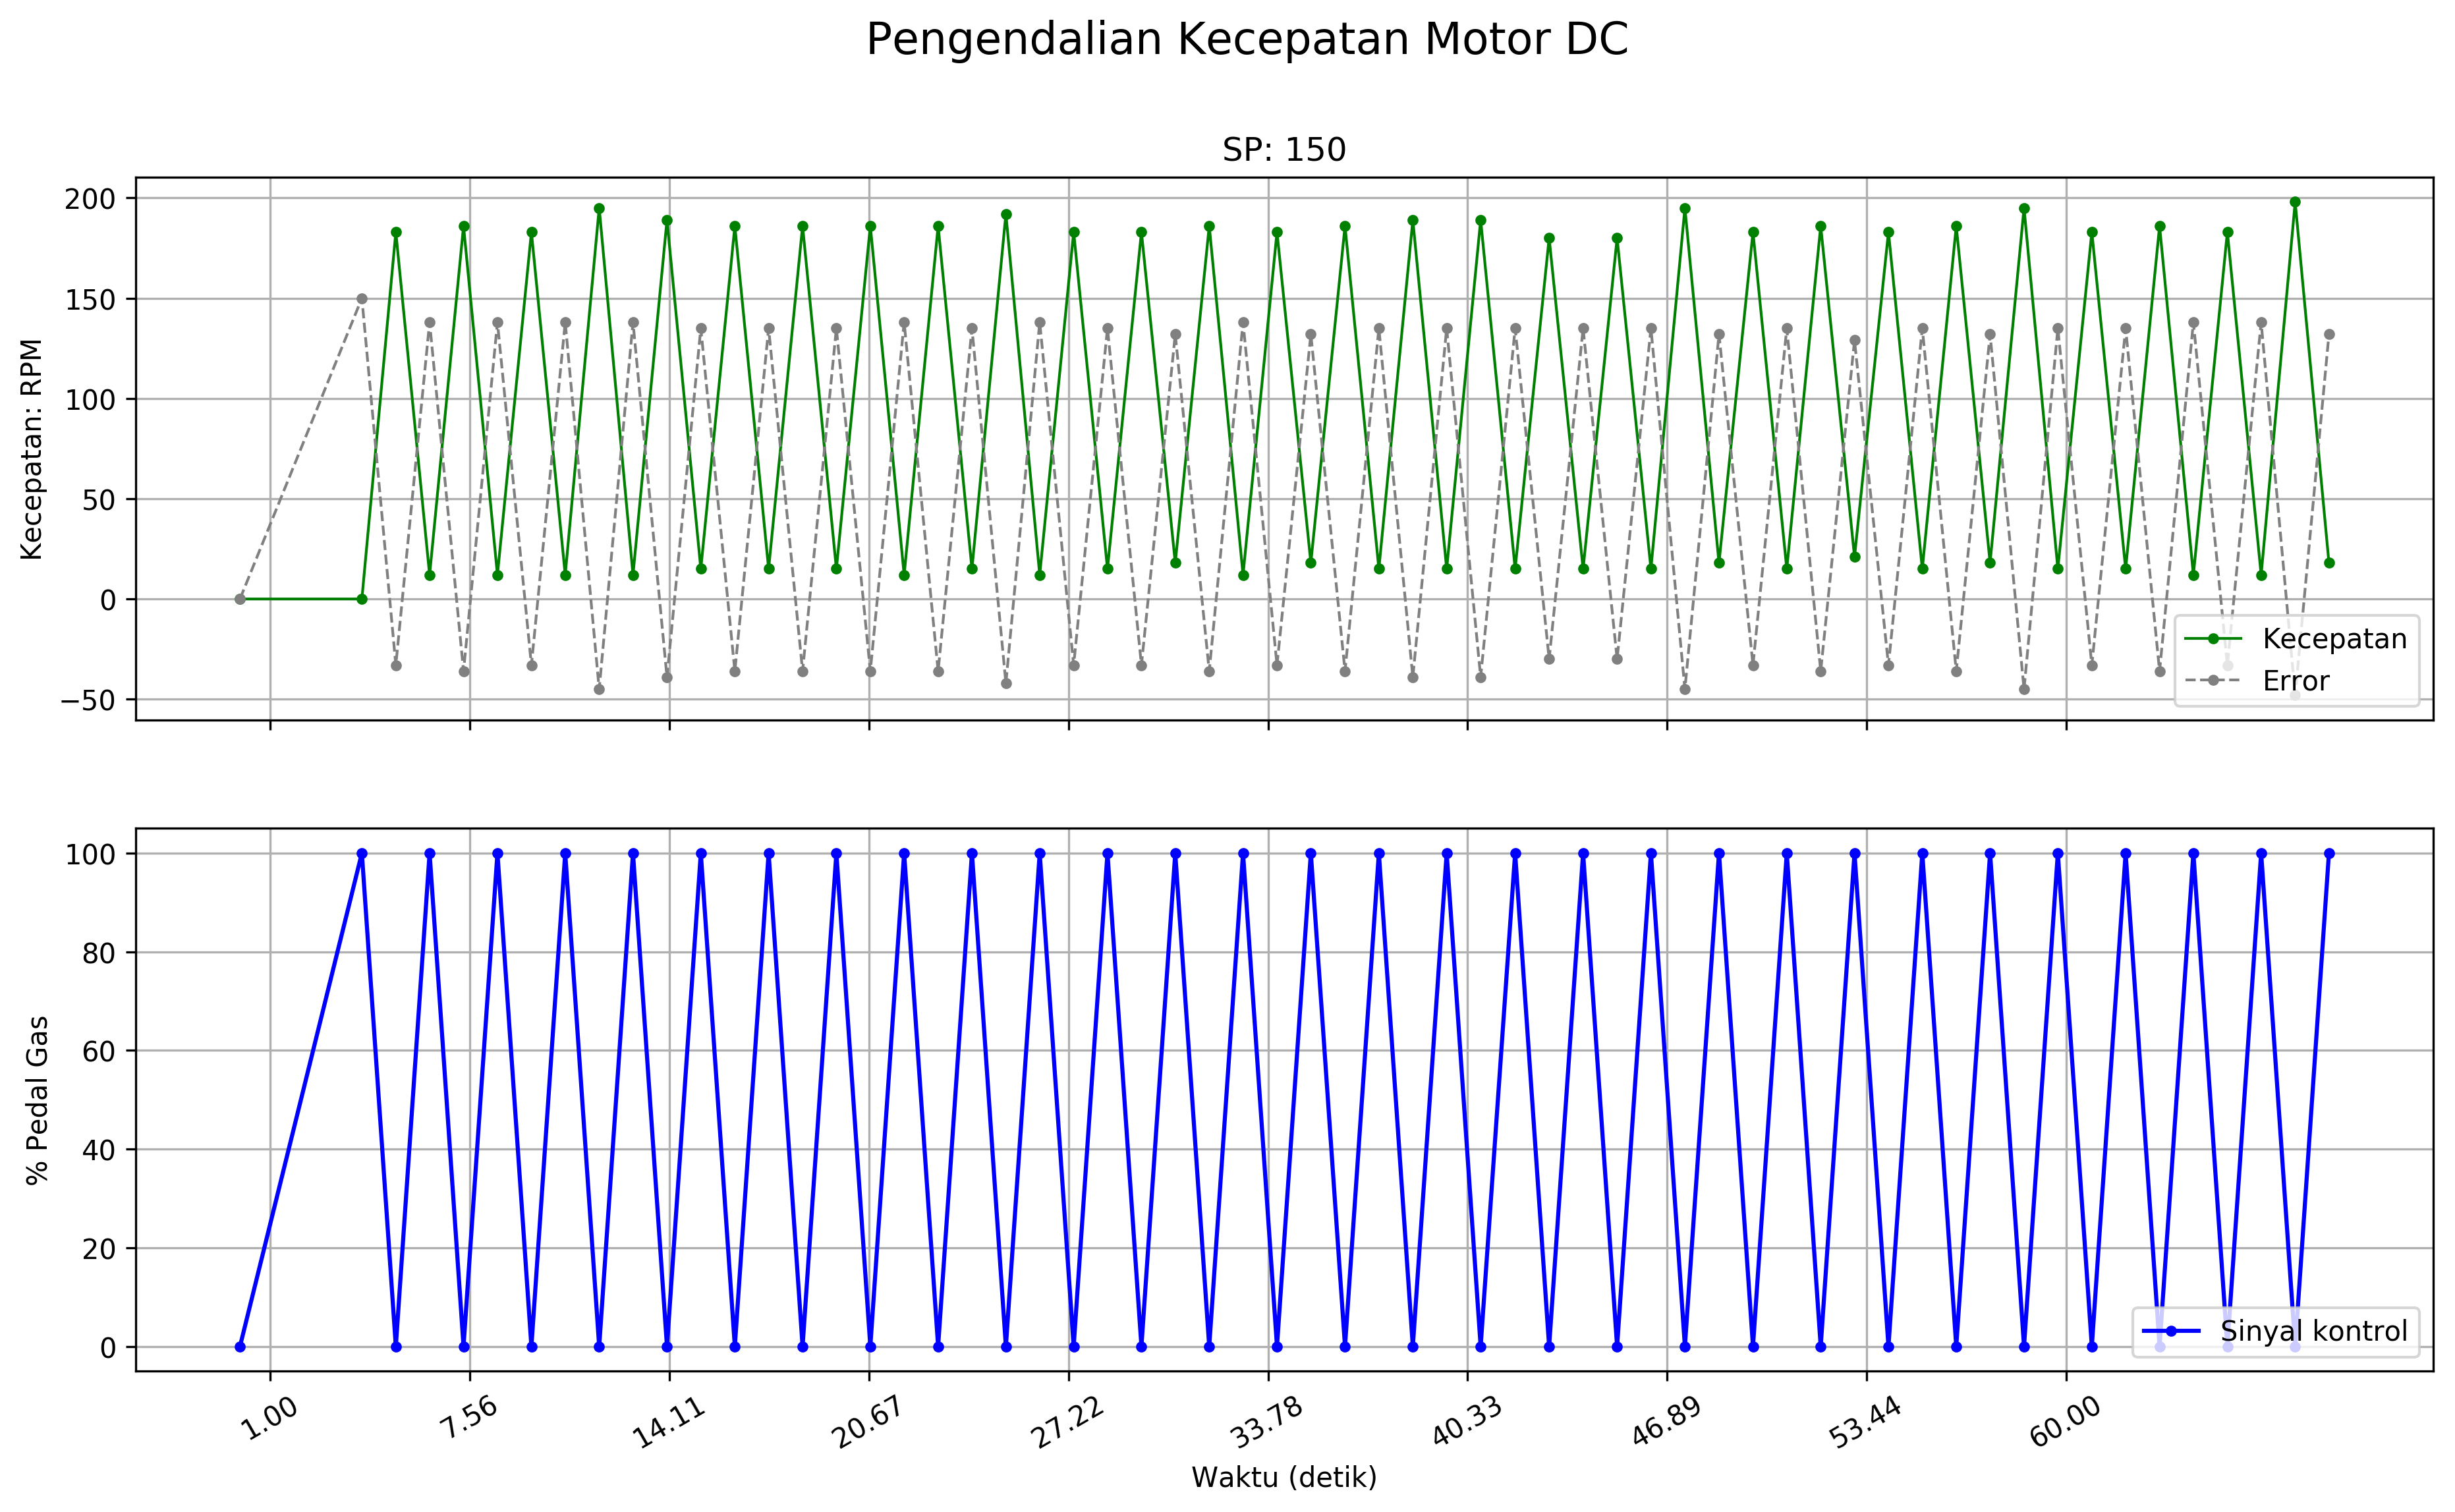

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot results
fig= plt.figure(figsize=(15,8), dpi=300)
fig.suptitle('Pengendalian Kecepatan Motor DC' , fontsize=16)

plt.subplot(2,1,1)
plt.title('SP: '+str(sp))
plt.gca().grid(True)
plt.plot(waktu, c_v, color="green", linewidth=1, marker=".", label="Kecepatan")
plt.plot(waktu, error , color="grey", linewidth=1, marker=".", linestyle="--", label="Error")
#plt.plot(waktu, s_p , color="red", linewidth=1, linestyle="--", label="Set-point")
plt.ylabel('Kecepatan: RPM')
plt.legend(loc='lower right', frameon=True)
plt.xticks(np.linspace(1,len(waktu),10,endpoint=True))
plt.tick_params(labelbottom='off')  

plt.subplot(2,1,2)
plt.gca().grid(True)
# select both y axis and x axis
#gridlines = plt.gca().get_xgridlines() + plt.gca().get_ygridlines()
plt.plot(waktu, aktuasi , color="blue",  marker=".", linewidth=1.5, label="Sinyal kontrol")
plt.ylabel('% Pedal Gas')    
plt.xlabel('Waktu (detik)')
plt.xticks(waktu, rotation=30)
plt.xticks(np.linspace(1,len(waktu),10,endpoint=True))
plt.legend(loc='lower right', frameon=True)

plt.savefig('mdc-on-off-3.png', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='legal', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=True)
plt.show()


In [ ]:
sum(error)

In [ ]:
conn.U1(0)°∑é®†††¥¥üü||œœππ‘~'±±≠≠][¶™∞∞∞™™]